In [1]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("50_Startups.csv")

In [33]:
data.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [13]:
#List unique values in the data['State'] column
data.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [39]:
X = data.iloc[:, :-1].values # Removing last column Profit 

In [37]:
y = data.iloc[:,4].values  # y is numpy.ndarray

In [46]:
type(y)

numpy.ndarray

In [41]:
# To convert the Categorical to Numeric
# Label Encoding
# One Hot Encoding 

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()

X[:, 3] = labelencoder.fit_transform(X[:, 3])

onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()


C:\Users\sachi\Anaconda2\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\sachi\Anaconda2\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [70]:
print X[:,0]

[0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 1.]


In [4]:
data.shape, data.size, data.ndim

((50, 5), 250, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [6]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
data.columns

Index([u'R&D Spend', u'Administration', u'Marketing Spend', u'State',
       u'Profit'],
      dtype='object')

C:\Users\sachi\Anaconda2\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


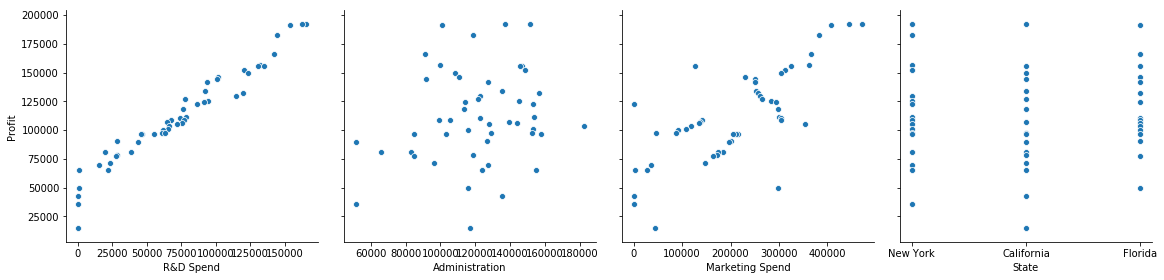

In [42]:
sns.pairplot(data, x_vars = ['R&D Spend','Administration','Marketing Spend','State'], y_vars = 'Profit', size=4, kind = 'scatter')

C:\Users\sachi\Anaconda2\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


AttributeError: 'str' object has no attribute 'conjugate'

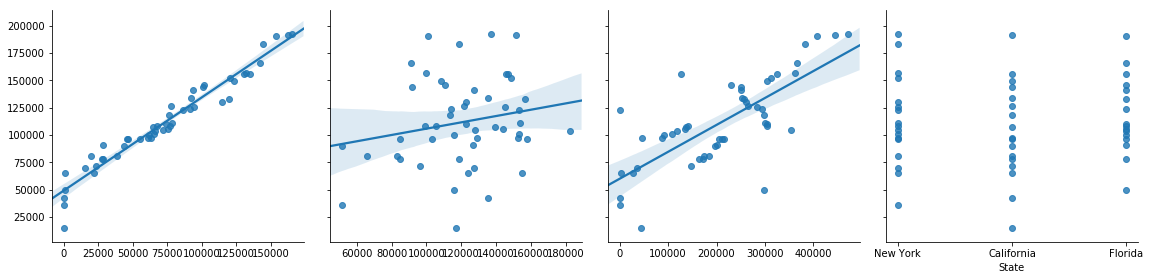

In [45]:
sns.pairplot(data, x_vars = ['R&D Spend','Administration','Marketing Spend','State'], y_vars = 'Profit', size=4, kind = 'reg')


In [11]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


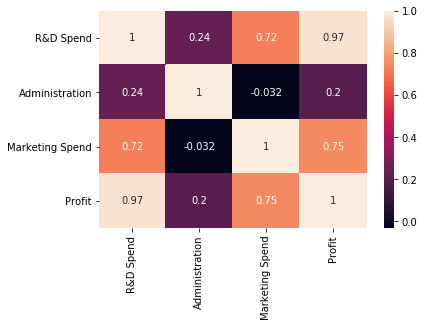

In [12]:
sns.heatmap(data.corr(), annot=True)
plt.show()

In [47]:
# Divide data into training and testing 

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [48]:
len(X_train),len(X_test),len(Y_train),len(Y_test)

(40, 10, 40, 10)

In [49]:
# Create the Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_train,Y_train)

# we get 2 things : B0 and B1 (coefficient) which gives regression line 

In [50]:
print model.intercept_
print model.coef_

54355.53473469091
[ 2.29476900e+03 -1.49941712e+03 -7.95351879e+02  8.17265007e-01
 -5.56257255e-02  2.19367049e-02]


In [51]:
# Make prediction

y_pred = model.predict(X_test)

In [52]:
y_pred

array([161280.45087763,  73626.47148425,  94136.64612163,  99269.70400143,
        59926.24314732,  51133.94307935, 163746.27541072,  97185.11390798,
       119187.67835849,  73867.24728986])

In [53]:
list(zip(Y_test, y_pred))

[(156122.51, 161280.45087763472),
 (90708.19, 73626.47148425222),
 (89949.14, 94136.64612163157),
 (103282.38, 99269.70400142675),
 (69758.98, 59926.24314731886),
 (14681.4, 51133.943079350094),
 (156991.12, 163746.275410724),
 (96778.92, 97185.11390797966),
 (118474.03, 119187.67835849084),
 (71498.49, 73867.24728986388)]

In [57]:
len(X_train),len(Y_train),type(X_train),type(Y_train)

(40, 40, numpy.ndarray, numpy.ndarray)

In [75]:
print X_train.ndim,Y_train.ndim,X_train[:,0].ndim

2 1 1


ValueError: Expected 2D array, got 1D array instead:
array=[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

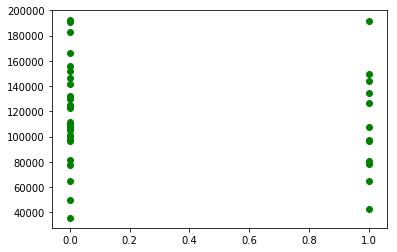

In [81]:
plt.scatter(X_train[:,0], Y_train, color = 'green')
plt.plot(X_train[:,0], model.predict(X_train[:,0]), color = 'red')

plt.title('Compare Training Result - Profit')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

ValueError: x and y must be the same size

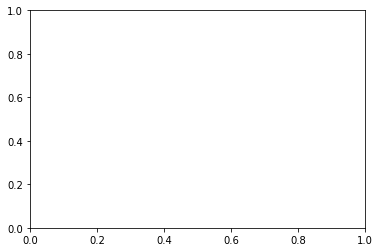

In [76]:
# Test Data

#plt.scatter(X_test, Y_test, color = 'green') #X[:,0]
plt.scatter(X_train[:,1], Y_test, color = 'green') #X[:,0]
#plt.plot(X_train, model.predict(X_train), color = 'red')

plt.title('Compare Test Result - Profit')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [61]:
# Model Evaluation Metrics for regression

from sklearn import metrics

print('y-Intercept               :',model.intercept_)
print('beta coefficient          :',model.coef_)
print('Mean abs error  MAE       :',metrics.mean_absolute_error(Y_test,y_pred))
print('Mean sqr error  MSE       :',metrics.mean_squared_error(Y_test,y_pred))
print('Root Mean sqr error  RMSE :',np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))
print('R Square                  :',metrics.r2_score(Y_test,y_pred))

('y-Intercept               :', 54355.53473469091)
('beta coefficient          :', array([ 2.29476900e+03, -1.49941712e+03, -7.95351879e+02,  8.17265007e-01,
       -5.56257255e-02,  2.19367049e-02]))
('Mean abs error  MAE       :', 8696.88764126769)
('Mean sqr error  MSE       :', 182941427.18943647)
('Root Mean sqr error  RMSE :', 13525.584171836588)
('R Square                  :', 0.8845999451668553)
